1. Menggunakan dataset StudentPerformance ( StudentPerformance-encoded.csv)

2. Lakukan feature selection terhadap fitur "lulus_tepatwaktu" menggunakan metode : PEARSON CORRELATION

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

In [ ]:
import pandas as pd 
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/StudentPerformance-encoded.csv')
df.head()

,Unnamed: 0,jenis_kelamin,umur,konsentrasi,asal,kos,uang_saku,paket_data,kendaraan,laptop,tipe_laptop,status_menikah,ip_sem1,ip_sem2,ip_sem3,ip_sem4,persentase_presensi,kacamata,gamer,durasi_sosmed (jam/hari),jumlah_akun_sosmed,clubbing,jumlah_org,score_toefl,jumlah_lomba,keadaan_ortu_divorced,romance,ukuran_sepatu,tinggi_badan,berat_badan,ipk,lulus_tepatwaktu
0,0,0,20,2,12,0,200000,50000,1,1,1,0,4.00,3.9,3.75,3.80,97,0,1,1,1,0,2,119,0,0,1,41,165,62.5,3.86,1
1,1,1,19,0,3,1,500000,70000,0,1,6,1,4.00,4.0,3.90,3.95,90,1,0,3,1,0,2,117,4,0,0,38,141,57.9,3.96,1
2,2,0,22,1,12,0,300000,100000,1,1,2,0,3.90,3.6,3.70,3.50,85,0,1,1,2,0,1,90,2,0,1,42,151,59.8,3.68,0
3,3,0,20,0,12,0,700000,100000,2,1,5,0,4.00,3.6,3.50,3.65,86,0,1,2,1,0,1,97,0,0,1,41,140,57.8,3.69,0
4,4,0,21,1,11,1,800000,80000,0,1,7,0,3.85,3.7,3.50,3.65,91,0,0,2,1,0,1,114,0,0,1,40,165,62.5,3.68,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                150 non-null    int64  
 1   jenis_kelamin             150 non-null    int64  
 2   umur                      150 non-null    int64  
 3   konsentrasi               150 non-null    int64  
 4   asal                      150 non-null    int64  
 5   kos                       150 non-null    int64  
 6   uang_saku                 150 non-null    int64  
 7   paket_data                150 non-null    int64  
 8   kendaraan                 150 non-null    int64  
 9   laptop                    150 non-null    int64  
 10  tipe_laptop               150 non-null    int64  
 11  status_menikah            150 non-null    int64  
 12  ip_sem1                   150 non-null    float64
 13  ip_sem2                   150 non-null    float64
 14  ip_sem3   

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols_banyak_unique = ['konsentrasi' , 'asal' , 'kendaraan', 'tipe_laptop' ]
#cols_dua_unique = ['jenis_kelamin', 'gamer' , 'clubbing', 'keadaan_ortu_divorced','romance', 'lulus_tepatwaktu' ]
for col in cols_banyak_unique:
   df[col]=le.fit_transform(df[col])
#for col in cols_dua_unique:
    # df[col]=le.fit_transform(df[col])
df.head()

,Unnamed: 0,jenis_kelamin,umur,konsentrasi,asal,kos,uang_saku,paket_data,kendaraan,laptop,tipe_laptop,status_menikah,ip_sem1,ip_sem2,ip_sem3,ip_sem4,persentase_presensi,kacamata,gamer,durasi_sosmed (jam/hari),jumlah_akun_sosmed,clubbing,jumlah_org,score_toefl,jumlah_lomba,keadaan_ortu_divorced,romance,ukuran_sepatu,tinggi_badan,berat_badan,ipk,lulus_tepatwaktu
0,0,0,20,2,12,0,200000,50000,1,1,1,0,4.00,3.9,3.75,3.80,97,0,1,1,1,0,2,119,0,0,1,41,165,62.5,3.86,1
1,1,1,19,0,3,1,500000,70000,0,1,6,1,4.00,4.0,3.90,3.95,90,1,0,3,1,0,2,117,4,0,0,38,141,57.9,3.96,1
2,2,0,22,1,12,0,300000,100000,1,1,2,0,3.90,3.6,3.70,3.50,85,0,1,1,2,0,1,90,2,0,1,42,151,59.8,3.68,0
3,3,0,20,0,12,0,700000,100000,2,1,5,0,4.00,3.6,3.50,3.65,86,0,1,2,1,0,1,97,0,0,1,41,140,57.8,3.69,0
4,4,0,21,1,11,1,800000,80000,0,1,7,0,3.85,3.7,3.50,3.65,91,0,0,2,1,0,1,114,0,0,1,40,165,62.5,3.68,0


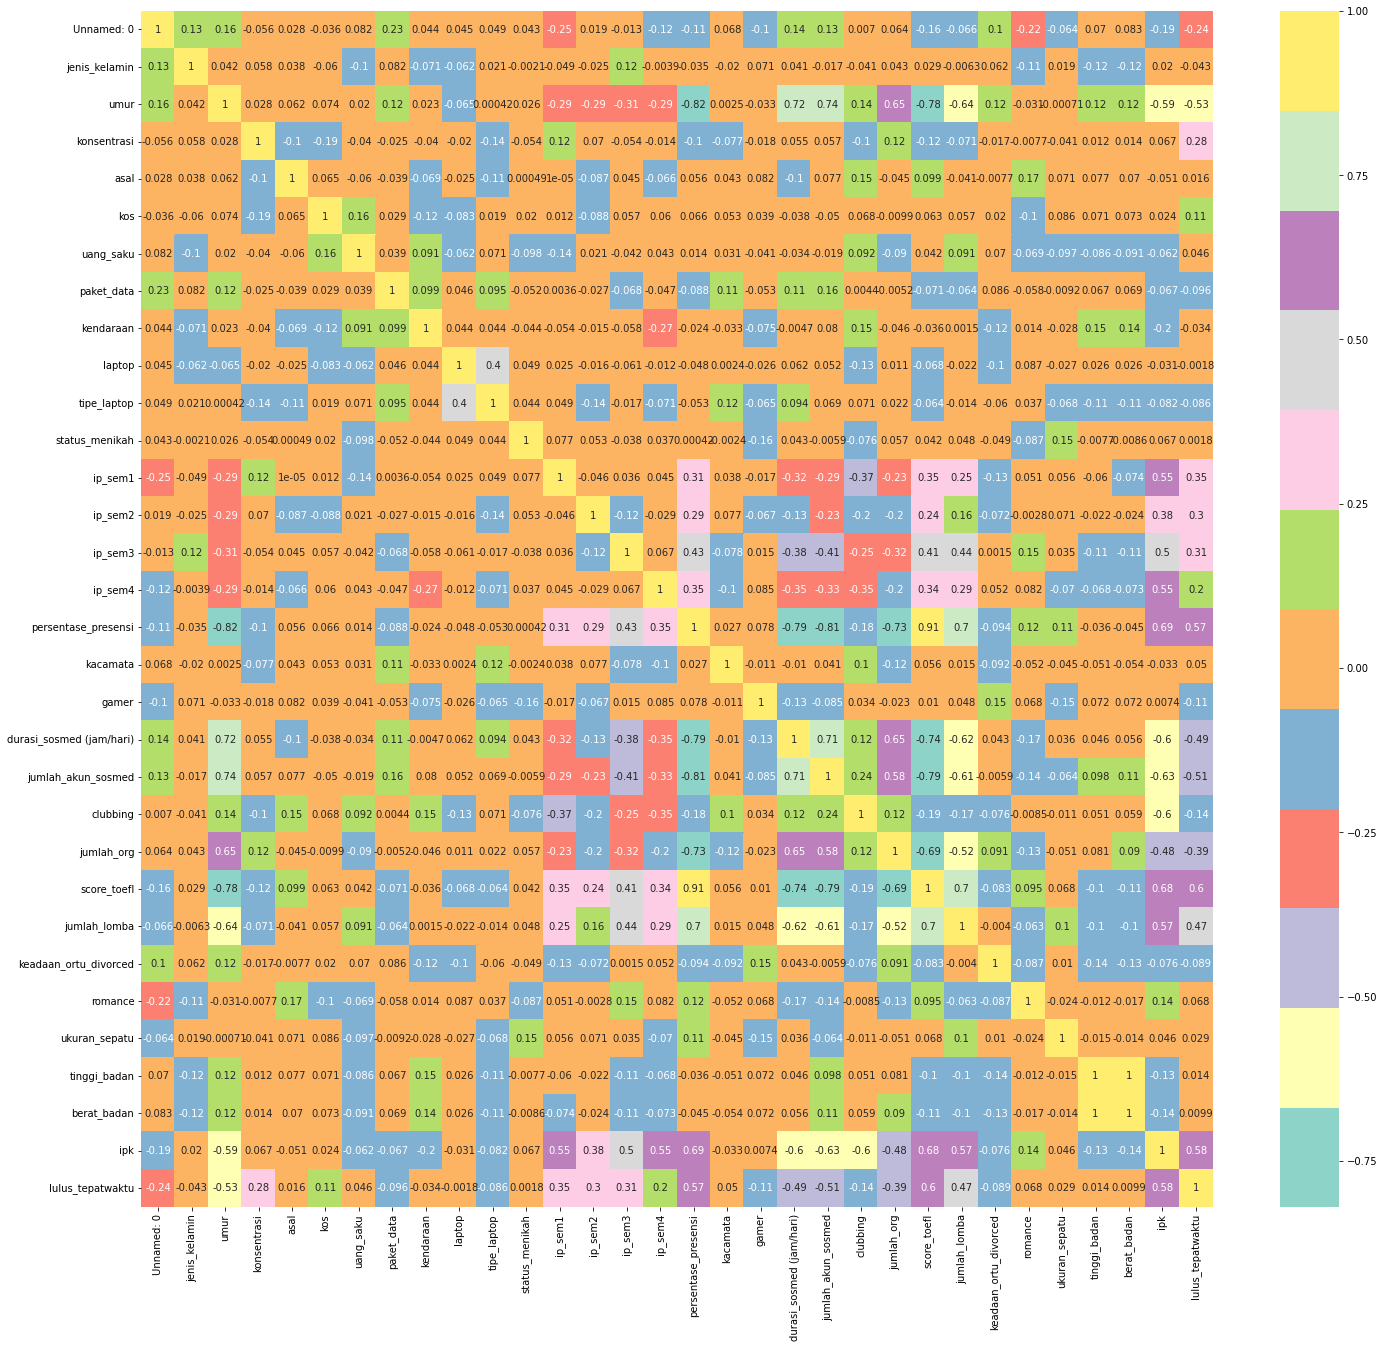

In [ ]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

cor = df.corr()
plt.figure(figsize=(24,22))
sns.heatmap(cor, cmap="Set3", annot= True)
plt.show()

3. Pilih fitur yang memiliki korelasi >= 0.5

In [ ]:
#correlation with output variable
cor_target= abs(cor['lulus_tepatwaktu'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.5]
relevant_features

umur                   0.534956
persentase_presensi    0.568904
jumlah_akun_sosmed     0.509860
score_toefl            0.595081
ipk                    0.582700
lulus_tepatwaktu       1.000000
Name: lulus_tepatwaktu, dtype: float64

4. Gunakan nilai test data sebesar 0.3 dan randomstate = 21

In [ ]:


X = df.iloc[:, [2, 16, 20, 23, 30]].values

y = df.iloc[:, 31].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.30,
                                                    random_state = 0)

In [ ]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(105, 5)
(105,)
(45, 5)
(45,)


5. Terapkan metode NAIVE BAYES untuk predict fitur "lulus_tepatwaktu"

In [ ]:
classifier_model_multiclass = GaussianNB()
classifier_model_multiclass.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred = classifier_model_multiclass.predict(X_test)


In [ ]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0])

In [ ]:
y_test

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0])

In [ ]:
classifier_model_multiclass.predict_proba(X_test)

array([[1.00000000e+00, 2.15517060e-26],
       [1.00000000e+00, 3.47496320e-32],
       [1.00000000e+00, 5.46657679e-26],
       [1.00000000e+00, 1.25723488e-24],
       [2.91180791e-03, 9.97088192e-01],
       [2.71703364e-03, 9.97282966e-01],
       [1.00000000e+00, 2.67193863e-42],
       [1.43193674e-05, 9.99985681e-01],
       [3.17045874e-03, 9.96829541e-01],
       [1.00000000e+00, 8.39696850e-41],
       [1.00000000e+00, 7.48688089e-38],
       [1.00000000e+00, 2.09690553e-36],
       [1.00000000e+00, 2.09744555e-21],
       [1.00000000e+00, 2.99753685e-39],
       [1.00000000e+00, 4.08924812e-35],
       [1.00000000e+00, 1.11492693e-26],
       [1.00000000e+00, 6.50743700e-32],
       [7.23533371e-04, 9.99276467e-01],
       [1.00000000e+00, 4.30091167e-29],
       [6.08519822e-04, 9.99391480e-01],
       [1.00000000e+00, 3.49010435e-28],
       [1.00000000e+00, 8.54978520e-43],
       [1.00000000e+00, 1.73281122e-49],
       [5.71184864e-04, 9.99428815e-01],
       [1.935788

In [ ]:
def predict_class(umur, persentase_presensi, jumlah_akun_sosmed, score_toefl, ipk):
  print('Prediction lulus Tepat Waktu : ', classifier_model_multiclass.predict([[umur, persentase_presensi, jumlah_akun_sosmed, score_toefl, ipk]]))
  print('Probability : ', classifier_model_multiclass.predict_proba([[umur, persentase_presensi, jumlah_akun_sosmed, score_toefl, ipk]]))

In [ ]:
predict_class(22, 80, 2, 120, 4)

Prediction lulus Tepat Waktu :  [1]
Probability :  [[0.00714325 0.99285675]]


6. Tampilkan hasil evaluasi model terhadap test data

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[32,  8],
       [ 0,  5]])

In [ ]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        40
           1       0.38      1.00      0.56         5

    accuracy                           0.82        45
   macro avg       0.69      0.90      0.72        45
weighted avg       0.93      0.82      0.85        45



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


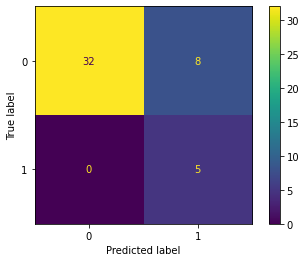

In [ ]:
import matplotlib.pyplot as plt
plot_confusion_matrix(classifier_model_multiclass, X_test, y_test)
plt.show()